Give weight to donors based on viability to them date Sept 9, 2024. Shuffling is wrong as I mixed up all the donors.

1. Given weights to 10 donors based on the viabilities on Day 2 and Day 4

2. Find the difference between weighted averages for cond1 and cond 3, observed diff

3. sample cond1 and cond3 shuffling and repeat 1000 times to get n diff between shuffled weighted avg of cond1 and cond3. Plot histogram and p value compared to observed_diff



 weights are 
 [0.03571429 0.00606909 0.09430439 0.08029879 0.17320261 0.23622782
 0.19561158 0.09103641 0.03594771 0.0515873 ]
27.49018207282914
k-value: 0.398
Diff: 27.49018207282914
P-value: 0.398


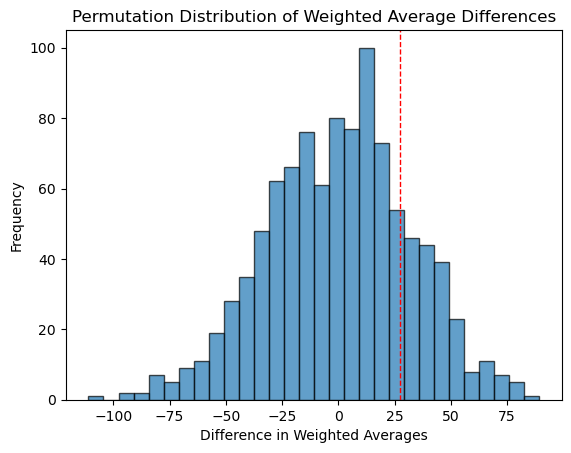

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X[0,:],X[2,:] #mention the condition you want to compare

def calculate_weighted_avg(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)
    return norm_W

def permutation_test_weighted_avg(cond1, cond3, norm_W, observed_diff, num_permutations=1000):
 

    # Combine the fold changes from both conditions
    combined = np.concatenate([cond1, cond3])
    
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    # Perform permutations
    for i in range(num_permutations):
        np.random.shuffle(combined)
        perm_cond1 = combined[:len(cond1)]
        perm_cond3 = combined[len(cond1):]
        perm_avg1 = np.sum(perm_cond1 * norm_W)
        perm_avg3 = np.sum(perm_cond3 * norm_W)
        perm_diffs[i] = perm_avg3 - perm_avg1
    

    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    print(f"k-value: {K_value}")

    return perm_diffs, p_value


#This is the proliferation vs. cytotoxicity code
folder_name='proliferation_by_day'

#change the day
cond1, cond3=cond('day16.dat')


D2_cond1, D2_cond3= cond('day2.dat')
D4_cond1, D4_cond3= cond('day4.dat')

#print(D4_cond1,D4_cond3)


#calculating weights based on day 2 and day 4
Y1=D2_cond1
Y2=D4_cond1
norm_W=calculate_weighted_avg(Y1,Y2)

print(f"\n\n weights are \n {norm_W}") #weight summed to 1

#difference in weighted average - observed
D9_diff=cond3-cond1
#print(D9_diff)
observed_diff=np.sum(D9_diff*norm_W)
print(observed_diff)


# Perform permutation test
perm_diffs, p_value = permutation_test_weighted_avg(cond1, cond3, norm_W, observed_diff)

print(f"Diff: {observed_diff}")
print(f"P-value: {p_value}")

# Plot the permutation distribution
plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
plt.title('Permutation Distribution of Weighted Average Differences')
plt.xlabel('Difference in Weighted Averages')
plt.ylabel('Frequency')
plt.show()

# mean_fc=np.nanmean(data_fc, axis=1)
# mean_fc_modified=np.delete(mean_fc,[6,7,8,9,10,11])
# print(f" \n\n mean is = \n {mean_fc_modified}")


In [ ]:
Give weight to donors based on viability to them date Sept 16, 2024 : Bernoulli's coin toss

1. Given weights to 10 donors based on the viabilities on Day 2 and Day 4 : Since all donors are same across days, we can assume donors weights are same across days for all conditions

2. Find the difference between weighted averages for cond1 and cond 3, observed diff

3. Go get the permutation distribution: Each donor will have same value with positive or negative sign. So, generate a vector of size 10 with Bernoulli's coin toss.
mutiply with original (w*A-w*B)=a*(A-B)

In a for loop, generate 1000 vectors with Bernoulli's coin toss. Plot histogram and p value compared to observed_diff



 weights are 
 [0.03571429 0.00606909 0.09430439 0.08029879 0.17320261 0.23622782
 0.19561158 0.09103641 0.03594771 0.0515873 ]
10.996027077497667
 vec_diff: [-20.9  -19.77  -3.9   15.5   -5.34   4.04  43.77   8.97  16.85  18.84]
k-value: 0.1645
p value: 0.1645
Diff: 10.996027077497667
P-value: 0.1645


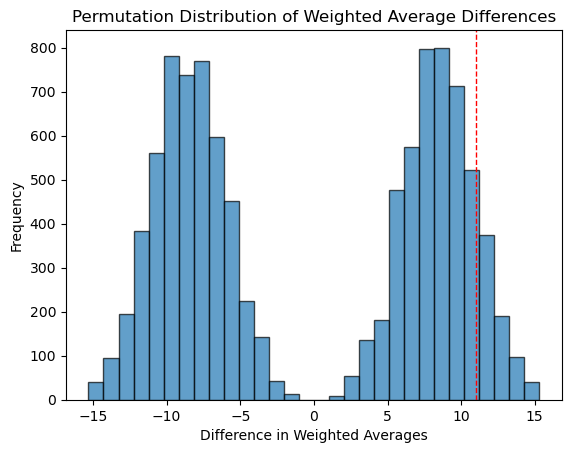

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X[0,:],X[2,:] #mention the condition you want to compare, for example cond1 & cond3

def calculate_weighted_avg(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W



def permutation_test_weighted_avg(vec_diff, norm_W, observed_diff, num_permutations=10000):

    print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample * norm_W)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}")
    return perm_diffs, p_value


def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution of Weighted Average Differences')
    plt.xlabel('Difference in Weighted Averages')
    plt.ylabel('Frequency')
    plt.show()
 
if __name__=='__main__':
    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'

    #change the day
    cond1, cond3=cond('day9.dat')

    #Extract the conditions from day 2 and day 4
    D2_cond1, D2_cond3= cond('day2.dat')
    D4_cond1, D4_cond3= cond('day4.dat')

    #print(D4_cond1,D4_cond3)


    #calculating weights based on day 2 and day 4 condition 1 or condition 3
    Y1=D2_cond1
    Y2=D4_cond1
    norm_W=calculate_weighted_avg(Y1,Y2)

    print(f"\n\n weights are \n {norm_W}") #weight summed to 1

    #difference in weighted average - observed
    vec_diff=cond3-cond1

    observed_diff=np.sum(vec_diff*norm_W)
    print(observed_diff)

    # Perform permutation test
    perm_diffs, p_value = permutation_test_weighted_avg(vec_diff, norm_W, observed_diff)

    print(f"Diff: {observed_diff}")
    print(f"P-value: {p_value}")

    plotting(perm_diffs,observed_diff)


In [ ]:
Give weight to donors based on viability to them date Sept 18, 2024 : Bernoulli's coin toss

1. Viability weights: Given weights to 10 donors based on the viabilities on Day 2 and Day 4 : Since all donors are same across days, we can assume donors weights are same across days for all conditions

2. Variability weights:  Find weights of donors for cond1 and cond2 separately, then add up and normalize

3. Then add the normalized variability weights with normalized viability weight and normalize. This will give a new weight w.

Find the difference between weighted averages for cond1 and cond 3, observed diff

3. Go get the permutation distribution: Each donor will have same value with positive or negative sign. So, generate a vector of size 10 with Bernoulli's coin toss.
mutiply with original (w*A-w*B)=a*(A-B)

In a for loop, generate 1000 vectors with Bernoulli's coin toss. Plot histogram and p value compared to observed_diff

normalized viability weights = [0.03571429 0.00606909 0.09430439 0.08029879 0.17320261 0.23622782
 0.19561158 0.09103641 0.03594771 0.0515873 ]
1.0 1.0 1.0
normalized variability weights = [0.01669396 0.0190161  0.23546533 0.28928727 0.08501476 0.12956024
 0.00533453 0.03800846 0.06760221 0.11401715]
net weight for donors = [0.02620412 0.0125426  0.16488486 0.18479303 0.12910869 0.18289403
 0.10047306 0.06452244 0.05177496 0.08280222] and sum=0.9999999999999998
10.379904215423286
 vec_diff: [-13.2    -9.59   -2.9    12.88   15.115  13.195  25.475  12.61    8.815
   9.055]
k-value: 0.0349
p value: 0.0349
Diff: 10.379904215423286
P-value: 0.0349


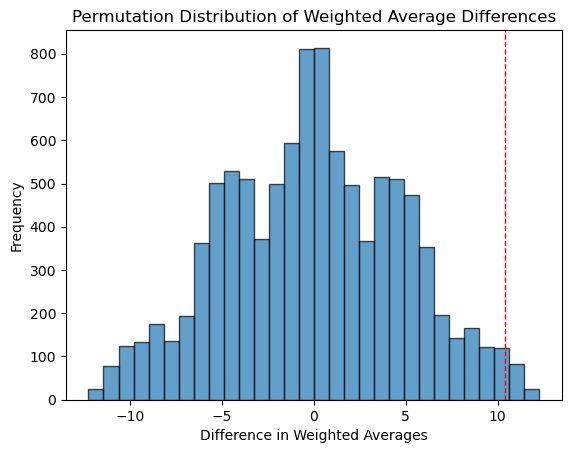

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X[0,:],X[2,:] #mention the condition you want to compare, for example cond1 & cond3

def calculate_weighted_avg(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def permutation_test_weighted_avg(vec_diff, norm_W, observed_diff, num_permutations=10000):

    print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample * norm_W)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}")
    return perm_diffs, p_value
def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond3)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution of Weighted Average Differences')
    plt.xlabel('Difference in Weighted Averages')
    plt.ylabel('Frequency')
    plt.show()
 
if __name__=='__main__':
    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    cond1_d7, cond3_d7=cond('day7.dat')
    cond1_d9, cond3_d9=cond('day9.dat')   

    cond1=(cond1_d7+cond1_d9)/2.0
    cond3=(cond3_d7+cond3_d9)/2.0

    #print(cond1_d7, cond1_d9,cond1)

    #Extract the conditions from day 2 and day 4
    D2_cond1, D2_cond3= cond('day2.dat')
    D4_cond1, D4_cond3= cond('day4.dat')

    #print(D4_cond1,D4_cond3)


    #calculating weights based on day 2 and day 4 condition 1 or condition 3
    Y1=D2_cond1
    Y2=D4_cond1
    norm_W_viability=calculate_weighted_avg(Y1,Y2)
    print(f'normalized viability weights = {norm_W_viability}') #weight summed to 1


    #Calculate weights for variability in each condition
    
    w1=variability_weights_cond(cond1)
    w3=variability_weights_cond(cond3)

    #print(w3,w1)

    var_w=(w1+w3)/sum(w1+w3)
    print(sum(w1), sum(w3), sum(var_w))
    print(f'normalized variability weights = {var_w}')

  
    net_weight=(norm_W_viability+var_w)/(sum(norm_W_viability+var_w))
    print(f'net weight for donors = {net_weight} and sum={sum(net_weight)}')

     #difference in weighted average - observed
    vec_diff=cond3-cond1
    observed_diff=np.sum(vec_diff*net_weight)
    print(observed_diff)


    # Perform permutation test
    perm_diffs, p_value = permutation_test_weighted_avg(vec_diff, net_weight, observed_diff)

    print(f"Diff: {observed_diff}")
    print(f"P-value: {p_value}")

    plotting(perm_diffs,observed_diff)


This is new code where we consider vaibility is also condition dependent
Give weight to donors based on viability to them date Sept 26, 2024 : Bernoulli's coin toss

1. Viability weights: Given weights to 10 donors based on the viabilities on Day 2 and Day 4 : Since all donors are same across days, we can assume donors weights are same across days for all conditions

2. Variability weights:  Find weights of donors for cond1 and cond2 separately, then add up and normalize

3. Then add the normalized variability weights with normalized viability weight and normalize. This will give a new weight w.

Find the difference between weighted averages for cond1 and cond 3, observed diff

3. Go get the permutation distribution: Each donor will have same value with positive or negative sign. So, generate a vector of size 10 with Bernoulli's coin toss.
mutiply with original (w*A-w*B)=a*(A-B)

In a for loop, generate 1000 vectors with Bernoulli's coin toss. Plot histogram and p value compared to observed_diff

normalized viability weights = [0.02268029 0.01940403 0.05372922 0.07098833 0.1918337  0.29408585
 0.19134569 0.09608822 0.02601244 0.03383224]
1.0 1.0 1.0
normalized variability weights = [0.01669396 0.0190161  0.23546533 0.28928727 0.08501476 0.12956024
 0.00533453 0.03800846 0.06760221 0.11401715]
net weight for donors = [0.01968712 0.01921006 0.14459727 0.1801378  0.13842423 0.21182304
 0.09834011 0.06704834 0.04680733 0.07392469] and sum=1.0
10.776724006783757
 vec_diff: [-13.2    -9.59   -2.9    12.88   15.115  13.195  25.475  12.61    8.815
   9.055]
k-value: 0.0319
p value: 0.0319
Diff: 10.776724006783757
P-value: 0.0319


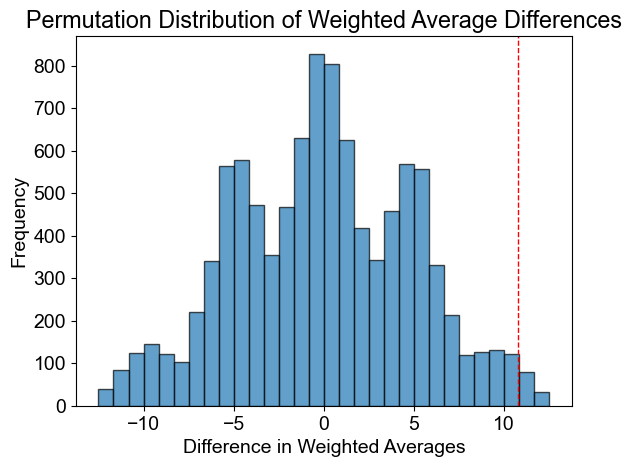

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X[0,:],X[2,:] #mention the condition you want to compare, for example cond1 & cond3

def calculate_weighted_avg(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def permutation_test_weighted_avg(vec_diff, norm_W, observed_diff, num_permutations=10000):

    print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample * norm_W)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}")
    return perm_diffs, p_value
def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond3)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution of Weighted Average Differences')
    plt.xlabel('Difference in Weighted Averages')
    plt.ylabel('Frequency')
    plt.show()
 
if __name__=='__main__':
    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    cond1_d7, cond3_d7=cond('day7.dat')
    cond1_d9, cond3_d9=cond('day9.dat')   

    cond1=(cond1_d7+cond1_d9)/2.0
    cond3=(cond3_d7+cond3_d9)/2.0

    #print(cond1_d7, cond1_d9,cond1)

    #Extract the conditions from day 2 and day 4
    D2_cond1, D2_cond3= cond('day2.dat')
    D4_cond1, D4_cond3= cond('day4.dat')

    #print(D4_cond1,D4_cond3)


    #calculating weights based on day 2 and day 4 condition 1 or condition 3

    norm_W_viability_cond1=calculate_weighted_avg(D2_cond1,D4_cond1) #normalize
    norm_W_viability_cond3=calculate_weighted_avg(D2_cond3,D4_cond3) #normalize
    norm_W_viability= (norm_W_viability_cond1+ norm_W_viability_cond3)/sum(norm_W_viability_cond1+ norm_W_viability_cond3)
    print(f'normalized viability weights = {norm_W_viability}') #weight summed to 1


    #Calculate weights for variability in each condition
    
    w1=variability_weights_cond(cond1)
    w3=variability_weights_cond(cond3)

    #print(w3,w1)

    var_w=(w1+w3)/sum(w1+w3)
    print(sum(w1), sum(w3), sum(var_w))
    print(f'normalized variability weights = {var_w}')

  
    net_weight=(norm_W_viability+var_w)/(sum(norm_W_viability+var_w))

    #net_weight=(norm_W_viability+var_w)
    print(f'net weight for donors = {net_weight} and sum={sum(net_weight)}')

     #difference in weighted average - observed
    vec_diff=cond3-cond1
    #print(vec_diff*net_weight)
    observed_diff=np.sum(vec_diff*net_weight)
    print(observed_diff)


    # Perform permutation test
    perm_diffs, p_value = permutation_test_weighted_avg(vec_diff, net_weight, observed_diff)

    print(f"Diff: {observed_diff}")
    print(f"P-value: {p_value}")

    plotting(perm_diffs,observed_diff)


Now Bill's suggestion Does this P value is by chance or really meaningful. How much other conditions (conditions 2-6) are separate than condition 1. Bonferroni test does not work here as the conditions are not independent. All conditions are connected by ILs and donors.  Date Sept 26, 2024
- Here bootsrapping were done in each column which is wrong as we are loosing donor idenitity

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

def calculate_donor_viability_weight_cond(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def bootstap_donors(matrix,net_weight):
        bootstrap_matrix = np.zeros_like(matrix) 
        bootstrap_weight_matrix = np.zeros_like(net_weight)
        diff=np.zeros_like(matrix)

        
        # Resample with replacement


        for i in range(matrix.shape[1]): #conditions as columns
            # bootstrap_sample = np.random.choice(matrix[:, i], size=matrix.shape[0], replace=True)
            # bootstrap_matrix[:,i]=bootstrap_sample
            # Generate the same random indices for both data and weights
            bootstrap_indices = np.random.choice(matrix.shape[0], size=matrix.shape[0], replace=True)
        
            # Apply the same indices to both matrix and net_weight_matrix
            bootstrap_matrix[:, i] = matrix[bootstrap_indices, i]
            bootstrap_weight_matrix[:, i] = net_weight[bootstrap_indices, i]
        
        #print("bootstrap matrix:\n", bootstrap_matrix)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Normalize the bootstrapped weight matrix so that each column sums to 1
        bootstrap_weight_matrix = bootstrap_weight_matrix / np.sum(bootstrap_weight_matrix,axis=0)


        # print("Bootstrap weight matrix (after normalization):\n", bootstrap_weight_matrix)
        # print(f'sum along rows = {np.sum(bootstrap_weight_matrix,axis=0)}')

        # Output
        for k in range(bootstrap_matrix.shape[1]):
            diff[:,k]=bootstrap_matrix[:,k]*bootstrap_weight_matrix[:,k]-bootstrap_matrix[:,0]*bootstrap_weight_matrix[:,0]
        fc_diff=diff[:,1:]

        #print(f' weighted difference matrix = \n {fc_diff}')

       
        return fc_diff

def permutation_test_weighted_avg(vec_diff,  observed_diff, num_permutations=1000):
    #here vec_diff is the difference between weighted value
    #print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    #print(f"k-value: {K_value}")
    # print(f"p value: {p_value}")
    return perm_diffs, p_value



if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        norm_W_viability_cond1=calculate_donor_viability_weight_cond(d2_data[:,0],d4_data[:,0]) #normalized cond1
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability= (norm_W_viability_cond1+ norm_W_viability_condx)/sum(norm_W_viability_cond1+ norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    print(f'weight viability matrix =\n  {weight_viability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        w1=variability_weights_cond(d8_data[:,0]) #normalized
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(w1+wx)/sum(w1+wx)
        print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    print(f'weight variability matrix =\n  {weight_variability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    #net_weight=(weight_variability_matrix+weight_viability_matrix)
    net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix)
    print(f'net weight for donors = \n {net_weight} and sum={sum(net_weight)}')



    #Bootstrapping within conditions on day 8 
    #remove condition 3 from day 8

    print(f'd8_data = \n {d8_data}')


    # Perform bootstrapping on the dataset at day 8
    n_bootstrap=1000
    p_matrix=np.zeros((n_bootstrap,5)) #shape (1000 x 5)

    for i in range(n_bootstrap): #1000 times
       fc_diff=bootstap_donors(d8_data,net_weight) #(10 x5)
       #print(fc_diff)  
       observed_diff=np.sum(fc_diff,axis=0) #5 elements 
       #print(f"observed diff= \n {observed_diff}")
       for cond in range(len(observed_diff)):
             # Perform permutation test
            #print( fc_diff[:,cond])
            perm_diffs, p_value = permutation_test_weighted_avg(fc_diff[:,cond], observed_diff[cond])
            p_matrix[i,cond]=p_value
        
    print(p_matrix)# shape (1000 x 5)   

    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(  p_matrix, rowvar=False)

    # Compute eigenvalues of the correlation matrix
    eigenvalues, _ = np.linalg.eig(correlation_matrix)

    # Output eigenvalues
    print("Eigenvalues of the correlation matrix:", eigenvalues)
    
    Neff=0
    eigenvalues=np.array(eigenvalues)
    for i in range(len(eigenvalues)):
        if(eigenvalues[i] > 1.0):
            temp=(eigenvalues[i]-1)
            Neff= Neff+temp

    print(f'Ne= {5-Neff}, Neff = {Neff}')        

    
      

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
weight viability matrix =
  [[0.03571429 0.03686123 0.02268029 0.03205802 0.03097542 0.03155857]
 [0.00606909 0.02059529 0.01940403 0.03569657 0.03056143 0.03554988]
 [0.09430439 0.06627656 0.05372922 0.08007241 0.06489413 0.09019923]
 [0.08029879 0.07118139 0.07098833 0.1318096  0.1205795  0.10558907]
 [0.17320261 0.15155199 0.1918337  0.20743787 0.19477335 0.20009824]
 [0.23622782 0.22011054 0.29408585 0.20641755 0.17811391 0.16167219]
 [0.19561158 0.18585005 0.19134569 0.15202732 0.18597783 0.18860333]
 [0.09103641 0.17253288 0.09608822 0.070047   0.09713111 0.10543641]
 [0.03594771 0.0326479  0.02601244 0.04263174 0.04109214 0.03750351]
 [0.0515873  0.04239

Now, Bill's suggestion Does this P value is by chance or really meaningful. How much other conditions (conditions 2-6) are separate than condition 1. Bonferroni test does not work here as the conditions are not independent. All conditions are connected by ILs and donors.To preserve donor identity, we have bootstrapped the whole row in the diff matrix (10 x 5).   Date Sept 30, 2024
The iteration would be 15000 for permutation distribution and 5000 for bootsrapping. The simulation time was 25 min. And we plotted histogram for each column in p-matrix. Among 5 column, 3 of them gave decaying distribution and telling condition 4 and condition 6 are related. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

def calculate_donor_viability_weight_cond(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def bootstap_donors(matrix,net_weight):
        bootstrap_matrix = np.zeros_like(matrix) 
        bootstrap_weight_matrix = np.zeros_like(net_weight)
        diff=np.zeros_like(matrix)

        
        # Resample with replacement
        # Generate the same random indices for both data and weights
        bootstrap_indices = np.random.choice(matrix.shape[0], size=matrix.shape[0], replace=True)
        
        # Apply the same indices to both matrix and net_weight_matrix simultaneously
        bootstrap_matrix = matrix[bootstrap_indices, :]
        bootstrap_weight_matrix = net_weight[bootstrap_indices, :]
        
        #print("bootstrap matrix:\n", bootstrap_matrix)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Normalize the bootstrapped weight matrix so that each column sums to 1
        bootstrap_weight_matrix = bootstrap_weight_matrix / np.sum(bootstrap_weight_matrix,axis=0)


        #print("Bootstrap weight matrix (after normalization):\n", bootstrap_weight_matrix)
        #print(f'sum along rows = {np.sum(bootstrap_weight_matrix,axis=0)}')

        # Output
       
        #print(f' weighted difference matrix = \n {fc_diff}')
        observed_diff = bootstrap_matrix*bootstrap_weight_matrix
       
        return observed_diff

def permutation_test_weighted_avg(vec_diff,  observed_diff, num_permutations=1000):
    #here vec_diff is the difference between weighted value
    #print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    #print(f"k-value: {K_value}")
    # print(f"p value: {p_value}")
    return perm_diffs, p_value



if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        norm_W_viability_cond1=calculate_donor_viability_weight_cond(d2_data[:,0],d4_data[:,0]) #normalized cond1
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability= (norm_W_viability_cond1+ norm_W_viability_condx)/sum(norm_W_viability_cond1+ norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    print(f'weight viability matrix =\n  {weight_viability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        w1=variability_weights_cond(d8_data[:,0]) #normalized
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(w1+wx)/sum(w1+wx)
        print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    print(f'weight variability matrix =\n  {weight_variability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    net_weight=(weight_variability_matrix+weight_viability_matrix) #UDC
    #net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix) 
    print(f'net weight for donors = \n {net_weight} and sum={sum(net_weight)}')

    UDC=net_weight[:,1:] #removing 1st condition
    print(f'UDC =\n,{UDC}')

    #Bootstrapping within conditions on day 8 
    #remove condition 3 from day 8

    #print(f'd8_data = \n {d8_data}')

    #original difference matrix at day 8
    fc_diff=np.zeros((10,5))
    for i in range(fc_diff.shape[1]):
            fc_diff[:,i]=d8_data[:,i+1]-d8_data[:,0]

    #print(f' difference between conditions wo weights =\n {fc_diff}')        

    p_original=np.zeros((1,5))

    NDC=UDC/(np.sum(UDC,axis=0))
    original_diff=NDC*fc_diff
    original_diff_value=np.sum(original_diff, axis=0)
    for cond in range(len(original_diff_value)):
             # Perform permutation test
        
            perm_diffs, p_value = permutation_test_weighted_avg(original_diff[:,cond], original_diff_value [cond])
            p_original[0,cond]=p_value



    # Perform bootstrapping on the dataset at day 8
    n_bootstrap=1000
    p_matrix=np.zeros((n_bootstrap,5)) #shape (1000 x 5)

    

    for i in range(n_bootstrap): #1000 times
       observed_diff=bootstap_donors(fc_diff,UDC) #(10 x5)
       #print(observed_diff)  
       observed_diff_value=np.sum(observed_diff,axis=0) #(5 x 1) elements 
       #print(f"observed diff values for conditions 2-6 = \n {observed_diff_value}")
       for cond in range(len(observed_diff_value)):
             # Perform permutation test
            #print( fc_diff[:,cond])
            perm_diffs, p_value = permutation_test_weighted_avg(observed_diff[:,cond], observed_diff_value[cond])
            p_matrix[i,cond]=p_value
        
    print(f'p_matrix= \n {p_matrix}')# shape (1000 x 5)   

    print(f'p original = \n {p_original}')

    # Combine them using vstack
    combined_vector = np.vstack((p_matrix, p_original))
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(  combined_vector, rowvar=False)

    # Compute eigenvalues of the correlation matrix
    eigenvalues, _ = np.linalg.eig(correlation_matrix)

    # Output eigenvalues
    print("Eigenvalues of the correlation matrix:", eigenvalues)
    
    Neff=0
    eigenvalues=np.array(eigenvalues)
    for i in range(len(eigenvalues)):
        if(eigenvalues[i] > 1.0):
            temp=(eigenvalues[i]-1)
            Neff= Neff+temp

    Me=5-Neff
    print(f'Me= {5-Neff}, Neff = {Neff}')        
    print(combined_vector.shape)
    print(f' p value effective = {Me * p_original[0,1]}')
      

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
weight viability matrix =
  [[0.03571429 0.03686123 0.02268029 0.03205802 0.03097542 0.03155857]
 [0.00606909 0.02059529 0.01940403 0.03569657 0.03056143 0.03554988]
 [0.09430439 0.06627656 0.05372922 0.08007241 0.06489413 0.09019923]
 [0.08029879 0.07118139 0.07098833 0.1318096  0.1205795  0.10558907]
 [0.17320261 0.15155199 0.1918337  0.20743787 0.19477335 0.20009824]
 [0.23622782 0.22011054 0.29408585 0.20641755 0.17811391 0.16167219]
 [0.19561158 0.18585005 0.19134569 0.15202732 0.18597783 0.18860333]
 [0.09103641 0.17253288 0.09608822 0.070047   0.09713111 0.10543641]
 [0.03594771 0.0326479  0.02601244 0.04263174 0.04109214 0.03750351]
 [0.0515873  0.04239

Histogram for each column of the p mtarix

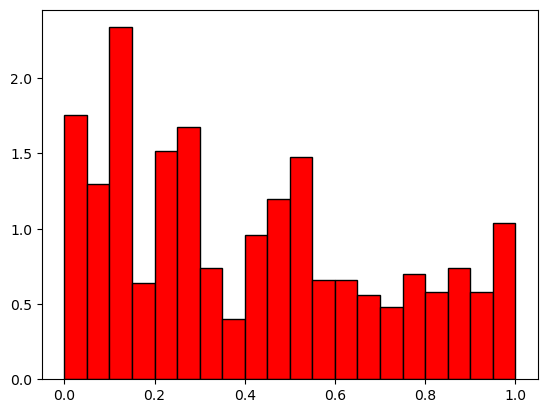

In [4]:
import matplotlib.pyplot as plt

plt.hist(combined_vector[:,4],bins=20, density=True,color='red', edgecolor='black')
#plt.hist(combined_vector[:,1],bins=20, density=True,color='blue',edgecolor='black')
plt.show()

In [5]:
 # Compute eigenvalues of the correlation matrix
eigenvalues, _ = np.linalg.eig(correlation_matrix)
print(correlation_matrix)

[[ 1.          0.01889451  0.04552149  0.00969001  0.03934402]
 [ 0.01889451  1.          0.01777867 -0.13813711  0.17007887]
 [ 0.04552149  0.01777867  1.          0.11739162  0.12588048]
 [ 0.00969001 -0.13813711  0.11739162  1.         -0.14530916]
 [ 0.03934402  0.17007887  0.12588048 -0.14530916  1.        ]]


Now plot all 6 conditions with bootrapping average and error bars, We can use this as SI figure.  Date Oct 4, 2024

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
weight viability matrix =
  [[0.03571429 0.03800818 0.0096463  0.02840176 0.02623656 0.02740286]
 [0.00606909 0.03512148 0.03273897 0.06532404 0.05505376 0.06503067]
 [0.09430439 0.03824874 0.01315405 0.06584043 0.03548387 0.08609407]
 [0.08029879 0.06206399 0.06167787 0.18332042 0.16086022 0.13087935]
 [0.17320261 0.12990137 0.21046478 0.24167312 0.21634409 0.22699387]
 [0.23622782 0.20399326 0.35194388 0.17660728 0.12       0.08711656]
 [0.19561158 0.17608853 0.1870798  0.10844307 0.17634409 0.18159509]
 [0.09103641 0.25402935 0.10114002 0.04905758 0.10322581 0.1198364 ]
 [0.03594771 0.02934809 0.01607717 0.04931578 0.04623656 0.0390593 ]
 [0.0515873  0.03319

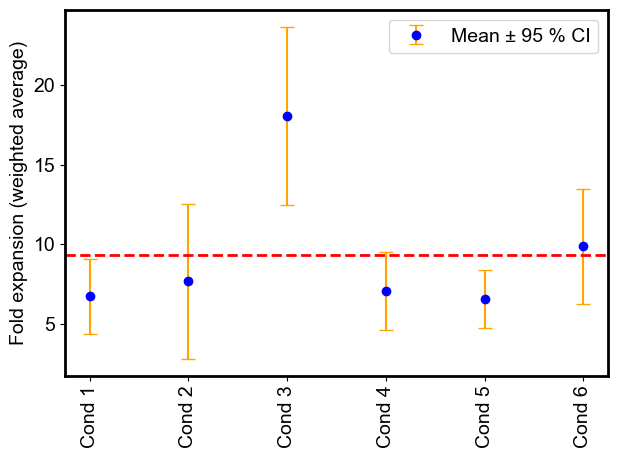

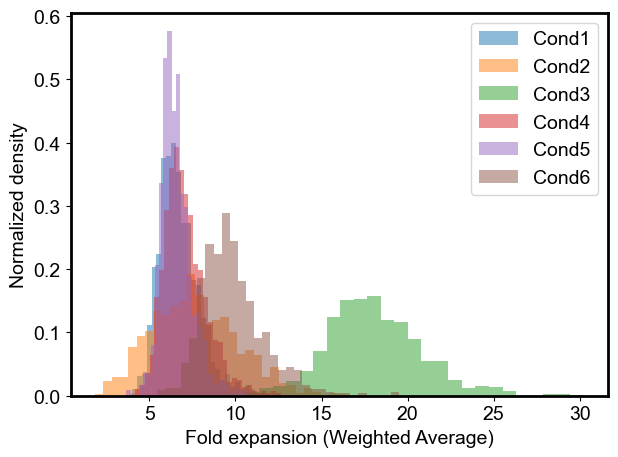

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

def calculate_donor_viability_weight_cond(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def bootstap_donors(matrix,net_weight):
        bootstrap_matrix = np.zeros_like(matrix) 
        bootstrap_weight_matrix = np.zeros_like(net_weight)
        diff=np.zeros_like(matrix)

        
        # Resample with replacement
        # Generate the same random indices for both data and weights
        bootstrap_indices = np.random.choice(matrix.shape[0], size=matrix.shape[0], replace=True)
        
        # Apply the same indices to both matrix and net_weight_matrix simultaneously
        bootstrap_matrix = matrix[bootstrap_indices, :]
        bootstrap_weight_matrix = net_weight[bootstrap_indices, :]
        
        #print("bootstrap matrix:\n", bootstrap_matrix)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Normalize the bootstrapped weight matrix so that each column sums to 1
        bootstrap_weight_matrix = bootstrap_weight_matrix / np.sum(bootstrap_weight_matrix,axis=0)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Output
       
        
        observed_diff = bootstrap_matrix*bootstrap_weight_matrix
        #print(f' observed_diffx = \n {observed_diff}')
        return observed_diff



if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        #norm_W_viability_cond1=calculate_donor_viability_weight_cond(d2_data[:,0],d4_data[:,0]) #normalized cond1
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability= ( norm_W_viability_condx)/sum( norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    print(f'weight viability matrix =\n  {weight_viability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        #w1=variability_weights_cond(d8_data[:,0]) #normalized
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(wx)/sum(wx)
        print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    print(f'weight variability matrix =\n  {weight_variability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    net_weight=(weight_variability_matrix+weight_viability_matrix) #UDC
    #net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix) 
    print(f'net weight for donors = \n {net_weight} and sum={sum(net_weight)}')


    #Bootstrapping within conditions on day 8 
    #remove condition 3 from day 8

    print(f'd8_data = \n {d8_data}')

 
    UDC=net_weight
    print(f'UDC =\n,{UDC}')
    NDC=UDC/(np.sum(UDC,axis=0))
    original_data=NDC*d8_data
    original_weighted_average_value=np.sum(original_data, axis=0)
    print(f'original_weighted_average_value =', original_weighted_average_value)

    # # Perform bootstrapping on the dataset at day 8
    n_bootstrap=1000
    bootstrapped_weighted_average=np.zeros((n_bootstrap,6)) #shape (1000 x 5)

    

    for i in range(n_bootstrap): #1000 times
       product_matrix=bootstap_donors(d8_data,UDC) #(10 x5)
       bootstrapped_weighted_average[i,:]=np.sum(product_matrix,axis=0) #(5 x 1) elements 
    
    #print(bootstrapped_weighted_average)

    # Calculate mean and standard error for each column
    means = np.mean(bootstrapped_weighted_average, axis=0)
    std_devs = np.std(bootstrapped_weighted_average, axis=0)
    n = bootstrapped_weighted_average.shape[0]  # Number of samples
    sem = std_devs / np.sqrt(n)  # Standard error of the mean

    # Calculate 95% confidence intervals
    confidence_intervals = 1.96 * sem  # For 95% CI

    # Create x values for the columns
    x = np.arange(1, 7)  # Columns 1 to 6

    global_mean=np.mean(means)
    # Plotting
   
        # Set global font settings
    plt.rcParams.update({
        'font.family': 'Arial',  # Use Arial font
        'font.size': 14,         # Set font size
    })
    # Plot mean values with error bars for the 95% confidence interval
    plt.errorbar(x, means, yerr=1.96*std_devs, fmt='o', color='blue', 
                ecolor='orange', capsize=5, label='Mean ± 95 % CI')

    # Customize the plot
    plt.xticks(x, [f'Cond {i}' for i in range(1, 7)], rotation=90)  # Set x-tick labels
    plt.ylabel('Fold expansion (weighted average)')
    plt.legend()
    plt.tight_layout()

    # Plot the global mean as a vertical line
    plt.axhline(global_mean, color='red', linestyle='dashed', linewidth=2, label='Global Mean')


    # Show the plot
    # Access the Axes object
    ax = plt.gca()

    # Set the width of the x and y axes (spines)
    axes_width_size=2
    ax.spines['bottom'].set_linewidth(axes_width_size)
    ax.spines['left'].set_linewidth(axes_width_size)
    ax.spines['top'].set_linewidth(axes_width_size)  # Optional: set top spine width to 0 if not needed
    ax.spines['right'].set_linewidth(axes_width_size) 

    plt.show()
    
    # Define the number of columns
    num_columns = bootstrapped_weighted_average.shape[1]

    # Plot histogram for each column
    for i in range(num_columns):
        plt.hist(bootstrapped_weighted_average[:, i], bins=30,density=True, alpha=0.5, label=f'Cond{i+1}')

    # Customize the plot
    #plt.title('Histograms of Each Column')
    plt.xlabel('Fold expansion (Weighted Average)')
    plt.ylabel('Normalized density')
    plt.legend()
    #plt.grid()
    plt.tight_layout()
    ax = plt.gca()

    # Set the width of the x and y axes (spines)
    axes_width_size=2
    ax.spines['bottom'].set_linewidth(axes_width_size)
    ax.spines['left'].set_linewidth(axes_width_size)
    ax.spines['top'].set_linewidth(axes_width_size)  # Optional: set top spine width to 0 if not needed
    ax.spines['right'].set_linewidth(axes_width_size) 

    plt.show()
    # Show the plot
    plt.show()
    
    
 

Now, Bill's suggestion Does this P value is by chance or really meaningful. How much other conditions (conditions 2-6) are separate than condition 1. Bonferroni test does not work here as the conditions are not independent. All conditions are connected by ILs and donors.To preserve donor identity, we have bootstrapped the whole row in the diff matrix (10 x 5).   Date Sept 30, 2024
The iteration would be 15000 for permutation distribution and 5000 for bootsrapping. The simulation time was 25 min. And we plotted histogram for each column in p-matrix. Among 5 column, 3 of them gave decaying distribution and telling condition 4 and condition 6 are related.   Modfify, where from each bootstrapped data column, weighted average value represening the difference_in_weighted_average
are subtracted.  Date: Oct 4, 2024

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

def calculate_donor_viability_weight_cond(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def bootstap_donors(matrix,net_weight):
        bootstrap_matrix = np.zeros_like(matrix) 
        bootstrap_weight_matrix = np.zeros_like(net_weight)
        diff=np.zeros_like(matrix)
       
        
        # Resample with replacement
        # Generate the same random indices for both data and weights
        bootstrap_indices = np.random.choice(matrix.shape[0], size=matrix.shape[0], replace=True)
        
        # Apply the same indices to both matrix and net_weight_matrix simultaneously
        bootstrap_matrix = matrix[bootstrap_indices, :]
        bootstrap_weight_matrix = net_weight[bootstrap_indices, :]
        
        #print("bootstrap matrix:\n", bootstrap_matrix)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Normalize the bootstrapped weight matrix so that each column sums to 1
        bootstrap_weight_matrix = bootstrap_weight_matrix / np.sum(bootstrap_weight_matrix,axis=0)


        #print("Bootstrap weight matrix (after normalization):\n", bootstrap_weight_matrix)
        #print(f'sum along rows = {np.sum(bootstrap_weight_matrix,axis=0)}')

        # Output
       
        #print(f' weighted difference matrix = \n {fc_diff}')
        observed_diff = bootstrap_matrix*bootstrap_weight_matrix
        
        return observed_diff

def permutation_test_weighted_avg(vec_diff,  observed_diff, num_permutations=15000):
    #here vec_diff is the difference between weighted value
    #print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    #print(f"k-value: {K_value}")
    # print(f"p value: {p_value}")
    return perm_diffs, p_value



if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        norm_W_viability_cond1=calculate_donor_viability_weight_cond(d2_data[:,0],d4_data[:,0]) #normalized cond1
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability= (norm_W_viability_cond1+ norm_W_viability_condx)/sum(norm_W_viability_cond1+ norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    print(f'weight viability matrix =\n  {weight_viability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        w1=variability_weights_cond(d8_data[:,0]) #normalized
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(w1+wx)/sum(w1+wx)
        print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    print(f'weight variability matrix =\n  {weight_variability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    net_weight=(weight_variability_matrix+weight_viability_matrix) #UDC
    #net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix) 
    print(f'net weight for donors = \n {net_weight} and sum={sum(net_weight)}')

    UDC=net_weight[:,1:] #removing 1st condition
    print(f'UDC =\n,{UDC}')

    #Bootstrapping within conditions on day 8 
    #remove condition 3 from day 8

    #print(f'd8_data = \n {d8_data}')

    #original difference matrix at day 8
    fc_diff=np.zeros((10,5))
    for i in range(fc_diff.shape[1]):
            fc_diff[:,i]=d8_data[:,i+1]-d8_data[:,0]

    print(f' difference between conditions wo weights =\n {fc_diff}')        

    p_original=np.zeros((1,5))

    NDC=UDC/(np.sum(UDC,axis=0))
    print("NDC", NDC)
    original_diff=NDC*fc_diff

    print("inner product", original_diff)
    original_diff_value=np.sum(original_diff, axis=0)
    print("inner product sum", original_diff_value)

    

    
    for cond in range(len(original_diff_value)):
             # Perform permutation test
        
            perm_diffs, p_value = permutation_test_weighted_avg(original_diff[:,cond], original_diff_value [cond])
            p_original[0,cond]=p_value

    #Null representation
    null_representation=(fc_diff-original_diff_value)
    print("Null reprentation = ", null_representation)

    #print("null represtation * weight ",np.sum(NDC*null_representation),axis=0)

    # Perform bootstrapping on the dataset at day 8
    n_bootstrap=10000
    p_matrix=np.zeros((n_bootstrap,5)) #shape (1000 x 5)

    

    for i in range(n_bootstrap): #1000 times
       observed_diff=bootstap_donors(null_representation,UDC) #(10 x5)
       #print('observed_diff \n =',observed_diff)  
       observed_diff_value=np.sum(observed_diff,axis=0) #(5 x 1) elements 
       #print(f"observed diff values for conditions 2-6 = \n {observed_diff_value}")

 
       #print('null_representation=',null_representation)

       for cond in range(len(observed_diff_value)):
             # Perform permutation test
            #print( fc_diff[:,cond])
            perm_diffs, p_value = permutation_test_weighted_avg(observed_diff[:,cond], observed_diff_value[cond])
            p_matrix[i,cond]=p_value
        
    print(f'p_matrix= \n {p_matrix}')# shape (1000 x 5)   

    print(f'p original = \n {p_original}')

    # Combine them using vstack
    #combined_vector = np.vstack((p_matrix, p_original))
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(p_matrix, rowvar=False)

    # Compute eigenvalues of the correlation matrix
    eigenvalues, _ = np.linalg.eig(correlation_matrix)

    # Output eigenvalues
    print("Eigenvalues of the correlation matrix:", eigenvalues)
    
    Neff=0
    eigenvalues=np.array(eigenvalues)
    for i in range(len(eigenvalues)):
        if(eigenvalues[i] > 1.0):
            temp=(eigenvalues[i]-1)
            Neff= Neff+temp

    Me=5-Neff
    print(f'Me= {5-Neff}, Neff = {Neff}')        
    print(combined_vector.shape)
    print(f' p value effective = {Me * p_original[0,1]}')


        # Calculate the minimum of each row
    y = np.min(p_matrix, axis=1)
    print(p_matrix)
    #print(y.shape)
    #print(y[0:5])

    # Count how many values in y are less than 0.03
    count = np.sum(y < 0.031)
    print(count)
    print("p adjusted direct method", count/n_bootstrap)
      

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
weight viability matrix =
  [[0.03571429 0.03686123 0.02268029 0.03205802 0.03097542 0.03155857]
 [0.00606909 0.02059529 0.01940403 0.03569657 0.03056143 0.03554988]
 [0.09430439 0.06627656 0.05372922 0.08007241 0.06489413 0.09019923]
 [0.08029879 0.07118139 0.07098833 0.1318096  0.1205795  0.10558907]
 [0.17320261 0.15155199 0.1918337  0.20743787 0.19477335 0.20009824]
 [0.23622782 0.22011054 0.29408585 0.20641755 0.17811391 0.16167219]
 [0.19561158 0.18585005 0.19134569 0.15202732 0.18597783 0.18860333]
 [0.09103641 0.17253288 0.09608822 0.070047   0.09713111 0.10543641]
 [0.03594771 0.0326479  0.02601244 0.04263174 0.04109214 0.03750351]
 [0.0515873  0.04239

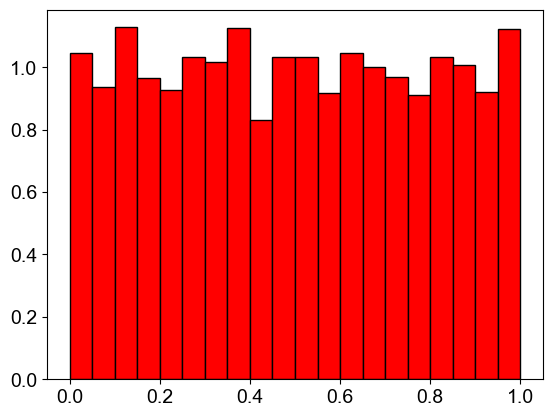

In [105]:
import matplotlib.pyplot as plt
# Save the matrix to a text file
np.savetxt('p_matrix_2.txt', p_matrix)

plt.hist(p_matrix[:,4],bins=20, density=True,color='red', edgecolor='black')
#plt.hist(combined_vector[:,1],bins=20, density=True,color='blue',edgecolor='black')
plt.show()

Null Hypothesis: All 6 conditions are different, AH: All conditions are different, check by permutation test and see if the p value is less than 0.05. The donor orders will be same in each condition, only Values of Fold Change will be Shuffled across 6 conditions in the permutation test. Date: Oct 10, 2024 

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
net weight for donors or UDC = 
 [[0.03823721 0.28132394 0.04051129 0.11351469 0.03145939 0.05801653]
 [0.01157609 0.27843724 0.06526417 0.09148011 0.07947107 0.53907527]
 [0.52935375 0.1091734  0.04903534 0.15603364 0.05185032 0.09139727]
 [0.51534815 0.24023826 0.20520305 0.43930338 0.58061722 0.1353488 ]
 [0.20257329 0.15297816 0.35112361 0.41094769 0.63610109 0.23282941]
 [0.28435533 0.21405782 0.56293685 0.2315925  0.18576922 0.08980221]
 [0.19826855 0.18535323 0.1950919  0.1139469  0.18164965 0.18187799]
 [0.10666346 0.25679553 0.16152989 0.30504054 0.12013454 0.593881  ]
 [0.04499554 0.14802402 0.14223376 0.07423688 0.0573062  0.04023524]
 [0.06862862 0.

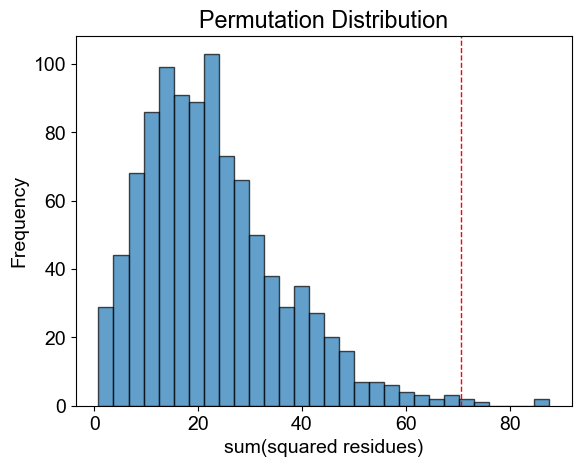

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

def calculate_donor_viability_weight_cond(Y1,Y2):
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])


    norm_W=W/sum(W)

    return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

#This function calculates the sum of residues that how much the weighted average is different from the mean of the weighted average for each condition
def calculate_fluctuation(data):
    
        weighted_average=np.sum(data,axis=0)
        print(f'observed weighted average = {weighted_average}')  
        summed_fluctuation= np.sum((weighted_average-np.mean(weighted_average))**2)
        #print(f'observed flcutuation = ', observed_fluctuation)
        return summed_fluctuation

def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution')
    plt.xlabel('sum(squared residues)')
    plt.ylabel('Frequency')
    plt.show()

if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability=  norm_W_viability_condx/sum( norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    #print(f'weight viability matrix =\n  {weight_viability_matrix}')
    #print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(wx)/sum(wx)
        # print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    # print(f'weight variability matrix =\n  {weight_variability_matrix}')
    # print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    net_weight=(weight_variability_matrix+weight_viability_matrix) #UDC
    #net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix) 
    print(f'net weight for donors or UDC = \n {net_weight} and sum={sum(net_weight)}')

    UDC=net_weight
    NDC=net_weight/np.sum(net_weight,axis=0)
    print(f'Normalized weights or NDC =\n,{NDC}')
    print(np.sum(NDC,axis=0))

    Donor_weights=np.sum(NDC, axis=1)
    Donor_weights=Donor_weights/(np.sum(Donor_weights))
    print(f'Donor weights =', Donor_weights)


    print(d8_data)

   
    
    X=d8_data
    W=Donor_weights
    W = W.reshape(10, 1)
    prod=W*X
    print(f'prod={prod}')
    print(np.sum(prod,axis=0))
    observed_summed_fluctuation=calculate_fluctuation(prod)
    print(observed_summed_fluctuation)

    num_permutation=1000
    summed_fluctuation=np.zeros((num_permutation,1))
    indices=np.arange(X.shape[1])
    shuffled_weighted_data=np.zeros_like(prod)

    for i in range(num_permutation):
        for j in range(prod.shape[0]):
            np.random.shuffle(indices)
            shuffled_weighted_data[j,:]=prod[j,indices]
           
        print(f' shuffled_weighted_data = {shuffled_weighted_data}\n')
        summed_fluctuation[i]=calculate_fluctuation(shuffled_weighted_data)
    
    print(summed_fluctuation)

    #Calculate p-value
    p_value = np.mean(np.abs(summed_fluctuation) >= np.abs(observed_summed_fluctuation))
    k = 0
    for i in range(num_permutation):
        if np.abs(summed_fluctuation[i]) >= np.abs(observed_summed_fluctuation):
            k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutation
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}") 

    plotting(summed_fluctuation,observed_summed_fluctuation)



Examples test with normal distribution

In [110]:
import numpy as np

matrix=np.random.rand(1000,6)
mean_list=[i for i in range(6)]
print(mean_list)
data=matrix+mean_list
num_permutation=1000
X=data
summed_fluctuation=np.zeros((num_permutation,1))
indices=np.arange(X.shape[1])
#print(indices)
for i in range(num_permutation):
        np.random.shuffle(indices)
        shuffled_data=X[:,indices]
        #shuffled_weights=W[:,indices]
        #print(f' shuffled_data = {shuffled_data}\n')
        #print(f' shuffled_weights = {shuffled_weights}\n')
        
        summed_fluctuation[i]= np.sum(shuffled_data-np.mean(shuffled_data)**2)
        #print(summed_fluctuation)

print(summed_fluctuation)

observed_summed_fluctuation=4.5
    #Calculate p-value
p_value = np.mean(np.abs(summed_fluctuation) >= np.abs(observed_summed_fluctuation))
k = 0
for i in range(num_permutation):
        if np.abs(summed_fluctuation[i]) >= np.abs(observed_summed_fluctuation):
            k += 1

    # Compute the p-value by dividing the count by the total number of permutations
K_value = k / num_permutation
print(f"k-value: {K_value}")
print(f"p value: {p_value}") 


[0, 1, 2, 3, 4, 5]
[[-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.91659386]
 [-35985.916